In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./dataset/liar_dataset/train.tsv",sep="\t")
# test = pd.read_csv("./dataset/liar_dataset/test.tsv",sep="\t")

In [3]:
print(data.columns)
# ()
data.head()

Index(['ID of the statement', 'label', 'statement', 'subject', 'speaker',
       'job title speaker', 'state', 'party affiliatio', 'barely true counts',
       'false counts', 'half true counts', 'mostly true counts',
       'pants on fire counts', 'context'],
      dtype='object')


,ID of the statement,label,statement,subject,speaker,job title speaker,state,party affiliatio,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [4]:
data=data[["statement","label"]]

In [5]:
data.label.unique()

array(['FALSE', 'half-true', 'mostly-true', 'TRUE', 'barely-true',
       'pants-fire'], dtype=object)

In [6]:
# test.describe()

In [7]:
def encode_label(label):
   
    if label == "true" or label == "mostly-true" or label=="barely-true":
        return 1
    elif label == "FALSE" or label == "pants-fire":
        return 0
    else:
        return None

In [8]:
data["label_numeric"] = data["label"].apply(encode_label)


In [9]:
data.label_numeric.unique()

array([ 0., nan,  1.])

In [10]:
data.label_numeric

0        0.0
1        NaN
2        1.0
3        0.0
4        NaN
5        NaN
6        1.0
7        NaN
8        NaN
9        1.0
10       1.0
11       NaN
12       0.0
13       1.0
14       1.0
15       NaN
16       NaN
17       1.0
18       NaN
19       1.0
20       0.0
21       1.0
22       1.0
23       NaN
24       1.0
25       0.0
26       1.0
27       NaN
28       0.0
29       1.0
        ... 
10210    NaN
10211    NaN
10212    NaN
10213    1.0
10214    0.0
10215    1.0
10216    0.0
10217    NaN
10218    0.0
10219    NaN
10220    1.0
10221    0.0
10222    NaN
10223    1.0
10224    1.0
10225    NaN
10226    1.0
10227    0.0
10228    1.0
10229    1.0
10230    1.0
10231    NaN
10232    NaN
10233    0.0
10234    NaN
10235    1.0
10236    1.0
10237    NaN
10238    0.0
10239    0.0
Name: label_numeric, Length: 10240, dtype: float64

In [11]:
data = data[['statement', 'label_numeric']].dropna()

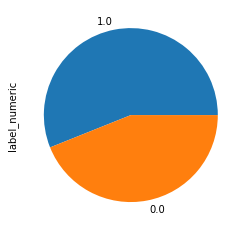

In [12]:
pd.value_counts(data['label_numeric']).plot.pie()

In [13]:
data

,statement,label_numeric
0,Says the Annies List political group supports ...,0.0
2,"Hillary Clinton agrees with John McCain ""by vo...",1.0
3,Health care reform legislation is likely to ma...,0.0
6,Jim Dunnam has not lived in the district he re...,1.0
9,Says GOP primary opponents Glenn Grothman and ...,1.0
10,"For the first time in history, the share of th...",1.0
12,When Mitt Romney was governor of Massachusetts...,0.0
13,The economy bled $24 billion due to the govern...,1.0
14,Most of the (Affordable Care Act) has already ...,1.0
17,"U.S. Rep. Ron Kind, D-Wis., and his fellow Dem...",1.0
